In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Paths to dataset

In [39]:
# Definition of paths
data_dir = os.path.join(os.getcwd(), '../Dataset')

raw_data_dir = os.path.join(data_dir, 'raw')
ids_mapping = os.path.join(raw_data_dir, 'IDS_mapping.csv')
diabetes_data = os.path.join(raw_data_dir, 'diabetic_data.csv')

mapping_data_dir = os.path.join(data_dir, 'Mapping')
os.makedirs(mapping_data_dir, exist_ok=True)

preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)

admission_type_mapping_data = os.path.join(mapping_data_dir, 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(mapping_data_dir, 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(mapping_data_dir, 'admission_source_mapping.csv')

preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

In [40]:
df = pd.read_pickle(preprocessed_saved_filepath)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              69987 non-null  int64   
 1   patient_nbr               69987 non-null  int64   
 2   race                      69987 non-null  category
 3   gender                    69987 non-null  object  
 4   age                       69987 non-null  object  
 5   admission_type_id         69987 non-null  category
 6   discharge_disposition_id  69987 non-null  category
 7   admission_source_id       69987 non-null  category
 8   time_in_hospital          69987 non-null  int64   
 9   medical_specialty         69987 non-null  category
 10  num_lab_procedures        69987 non-null  int64   
 11  num_procedures            69987 non-null  int64   
 12  num_medications           69987 non-null  int64   
 13  number_outpatient         69987 non-null  int64   

## Categorical columns

In [42]:
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns

Index(['race', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'change', 'diabetesMed', 'readmitted', 'age-binned',
       'max_glu_serum_measured', 'A1Cresult_measured', 'repaglinide_measured',
       'glimepiride_measured', 'rosiglitazone_measured',
       'pioglitazone_measured', 'glyburide_measured', 'glipizide_measured',
       'metformin_measured', 'insulin_measured'],
      dtype='object')

### Helper functions

In [43]:
def plotPieChart(df, columnName):
  plt.pie(df[columnName].value_counts(), labels=df[columnName].value_counts().index, autopct='%1.1f%%')
  plt.title(f"Distribution of {columnName}")
  plt.show()

In [44]:
def plotValueCounts(df, columnName):
  sns.countplot(x=columnName, data=df, order=df[columnName].value_counts().index)
  plt.xticks(rotation=90)
  plt.title(f"Distribution of {columnName}")
  plt.show()

In [45]:
def analyzeCategoricalColumn(df, columnName):
    print(f'Column name: {columnName}')
    print(f'Data type: {df[columnName].dtype}')

    print(f"mode: {df[columnName].mode()[0]}")
    
    print()
    uniqueValues = df[columnName].unique()
    print(f'Number of unique values: {len(uniqueValues)}')
    print()
    print('Unique values: ')
    print(f'{uniqueValues}')

    print()
    print('ValueCounts: ')
    print(df[columnName].value_counts())
    print()
    print('ValueCounts: Normalized')
    print(df[columnName].value_counts(normalize = True))

    print("Value count plot")
    plotValueCounts(df, columnName)

    print("Pie chart")
    plotPieChart(df, columnName)


### Column: 'race'

Column name: race
Data type: category
mode: Caucasian

Number of unique values: 6

Unique values: 
['Caucasian', 'AfricanAmerican', 'Unknown', 'Other', 'Asian', 'Hispanic']
Categories (6, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Unknown']

ValueCounts: 
race
Caucasian          52305
AfricanAmerican    12627
Unknown             1917
Hispanic            1501
Other               1149
Asian                488
Name: count, dtype: int64

ValueCounts: Normalized
race
Caucasian          0.747353
AfricanAmerican    0.180419
Unknown            0.027391
Hispanic           0.021447
Other              0.016417
Asian              0.006973
Name: proportion, dtype: float64
Value count plot


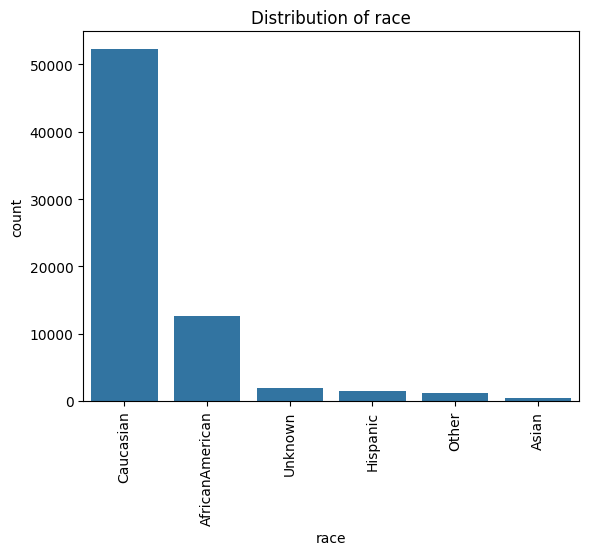

Pie chart


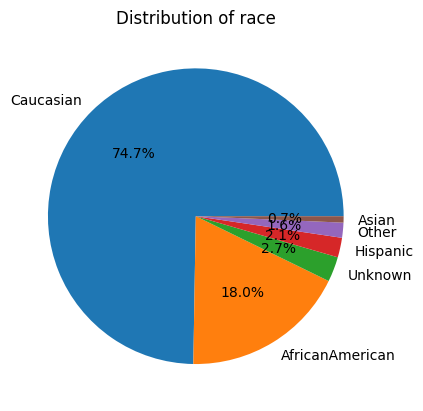

In [46]:
analyzeCategoricalColumn(df, 'race')

The Caucasian race dominates the data.

### Column: 'admission_type_id'

In [47]:
admtypid_df = pd.read_csv(admission_type_mapping_data)
admtypid_df.rename(columns={'description' : 'AdmissionType'}, inplace=True)

In [48]:
jdf = pd.merge(df, admtypid_df, on = 'admission_type_id', how ='inner')

Column name: AdmissionType
Data type: object
mode: Emergency

Number of unique values: 8

Unique values: 
[nan 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Available'
 'Not Mapped' 'Trauma Center']

ValueCounts: 
AdmissionType
Emergency        35478
Elective         13786
Urgent           12803
Not Available     3086
Not Mapped         291
Trauma Center       18
Newborn              9
Name: count, dtype: int64

ValueCounts: Normalized
AdmissionType
Emergency        0.541889
Elective         0.210567
Urgent           0.195552
Not Available    0.047135
Not Mapped       0.004445
Trauma Center    0.000275
Newborn          0.000137
Name: proportion, dtype: float64
Value count plot


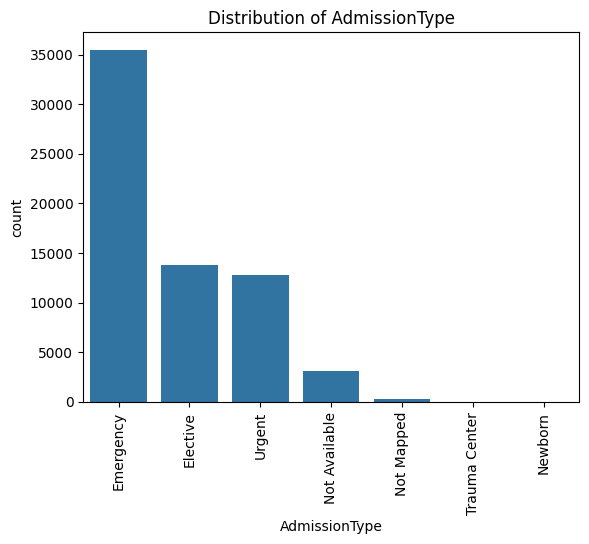

Pie chart


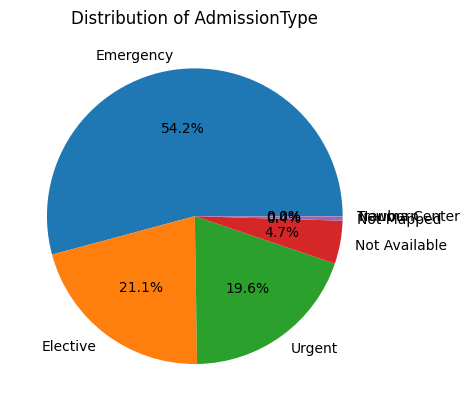

In [49]:
analyzeCategoricalColumn(jdf, 'AdmissionType')

Emergency admissions dominates the data.

### Column: 'discharge_disposition_id'

In [50]:
disdisp_df = pd.read_csv(discharge_disposition_data)
disdisp_df.rename(columns = {'description' : "DischargeDisposition"}, inplace=True)

In [51]:
jdf = pd.merge(df, disdisp_df, on = 'discharge_disposition_id', how = 'inner')

Column name: DischargeDisposition
Data type: object
mode: Discharged to home

Number of unique values: 21

Unique values: 
['Not Mapped' 'Discharged to home' 'Discharged/transferred to SNF'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to another type of inpatient care institution'
 'Left AMA'
 'Neonate discharged to another hospital for neonatal aftercare'
 'Discharged/transferred to ICF' nan
 'Discharged/transferred to home under care of Home IV provider'
 'Still patient or expected to return for outpatient services'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred to another rehab fac including rehab units of a hospital .'
 'Discharged/transferred to a long term care hospital.'
 'Admitted as an inpatient to this hospital'
 'Discharged/transferred within this

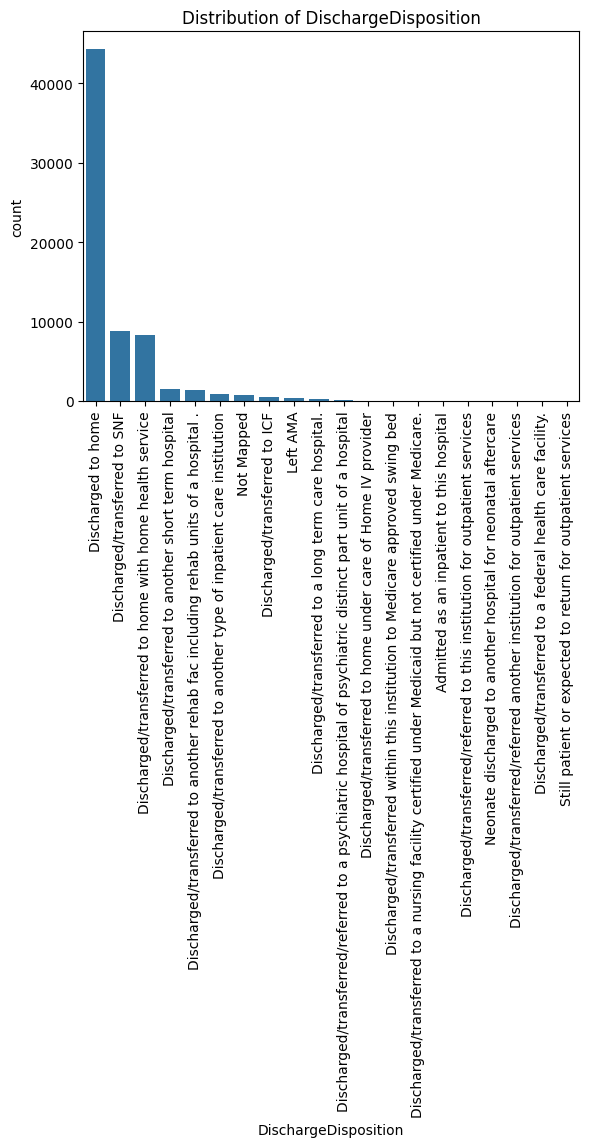

Pie chart


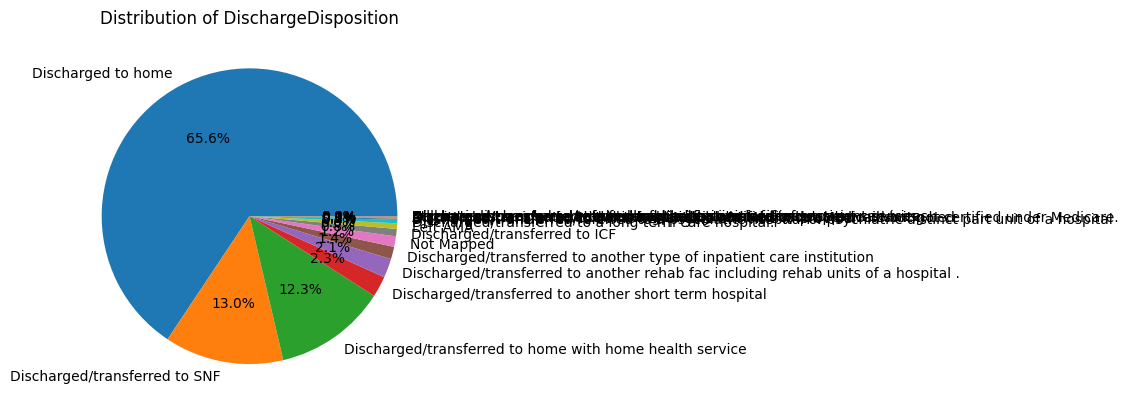

In [52]:
analyzeCategoricalColumn(jdf, 'DischargeDisposition')

Discharged to Home is the most common value. For now we keep the column as is. During model development, we may consider to group rare categories to 'Others'

### Column: 'admission_source_id'

In [53]:
admsrc_df = pd.read_csv(admission_source_mapping_data)
admsrc_df.rename(columns={'description' : 'AdmissionType'}, inplace=True)
jdf = pd.merge(df, admsrc_df, on = 'admission_source_id')

Column name: AdmissionType
Data type: object
mode:  Emergency Room

Number of unique values: 17

Unique values: 
[' Physician Referral' ' Emergency Room' 'Clinic Referral'
 'Transfer from a hospital'
 ' Transfer from a Skilled Nursing Facility (SNF)' ' Not Mapped'
 ' Transfer from another health care facility' 'HMO Referral' nan
 ' Court/Law Enforcement' ' Not Available' ' Extramural Birth'
 ' Transfer from critial access hospital'
 ' Transfer from hospital inpt/same fac reslt in a sep claim'
 'Normal Delivery' ' Transfer from Ambulatory Surgery Center' ' Sick Baby']

ValueCounts: 
AdmissionType
 Emergency Room                                               37271
 Physician Referral                                           21748
Transfer from a hospital                                       2530
 Transfer from another health care facility                    1785
Clinic Referral                                                 908
 Transfer from a Skilled Nursing Facility (SNF)          

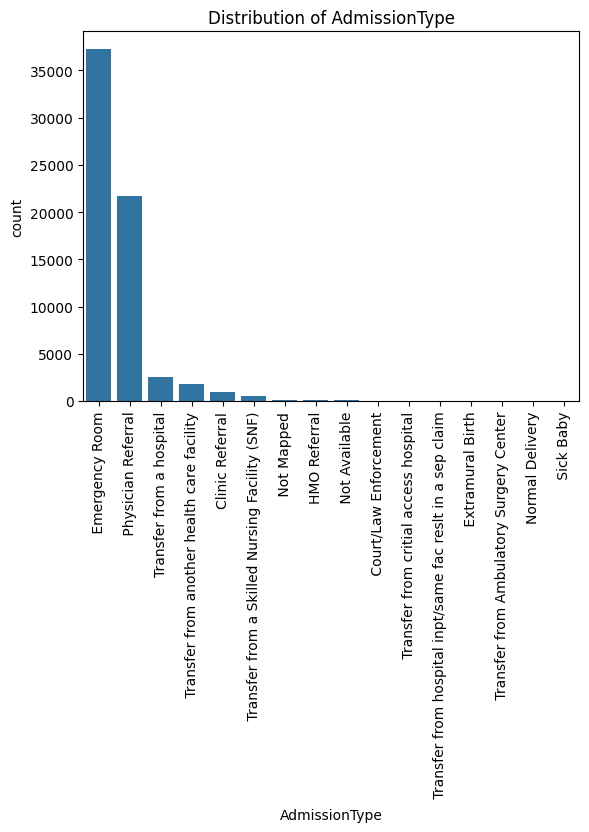

Pie chart


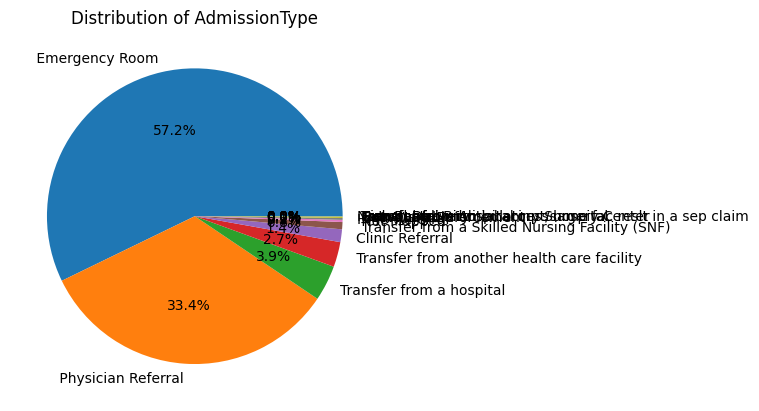

In [54]:
analyzeCategoricalColumn(jdf, 'AdmissionType')

Emergency Room is the most common value. For now we can keep it as is. Later during model development, we may consider grouping rare categories to 'Others'

### Column: 'medical_specialty'

Column name: medical_specialty
Data type: category
mode: Unknown

Number of unique values: 71

Unique values: 
['Pediatrics-Endocrinology', 'Unknown', 'InternalMedicine', 'Family/GeneralPractice', 'Cardiology', ..., 'Perinatology', 'Neurophysiology', 'Endocrinology-Metabolism', 'DCPTEAM', 'Resident']
Length: 71
Categories (73, object): ['AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', ..., 'Surgery-Vascular', 'SurgicalSpecialty', 'Unknown', 'Urology']

ValueCounts: 
medical_specialty
Unknown                             33652
InternalMedicine                    10641
Family/GeneralPractice               4978
Emergency/Trauma                     4393
Cardiology                           4207
                                    ...  
Psychiatry-Addictive                    1
SportsMedicine                          1
Surgery-PlasticwithinHeadandNeck        1
Pediatrics-InfectiousDiseases           0
Pediatrics-AllergyandImmunology         0
Name: count, L

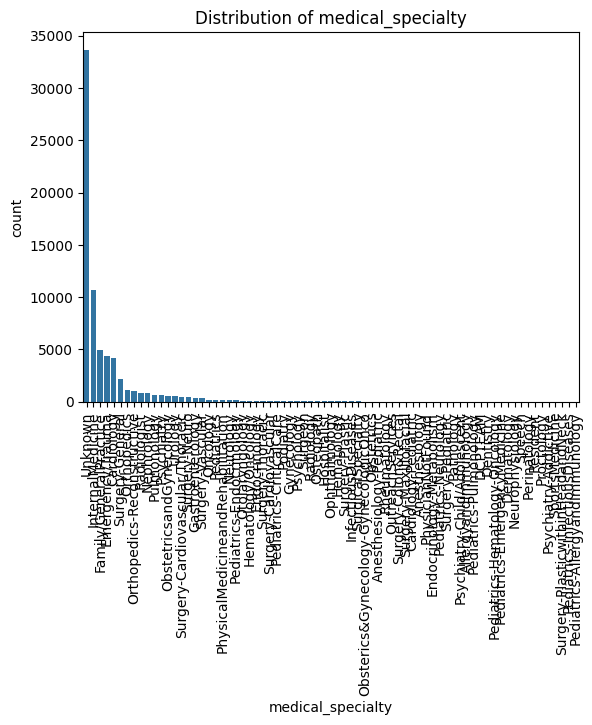

Pie chart


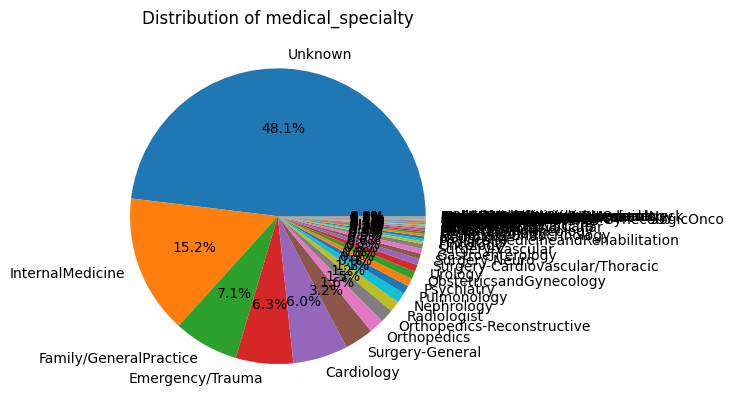

In [55]:
analyzeCategoricalColumn(df, 'medical_specialty')

Most common value is Unknown. We keep the column as is, during model development, we may consider to drop this column or merge rare categories to 'Other'

### Columns: 'diag_1', 'diag_2', 'diag_3'

Column name: diag_1
Data type: category
mode: Circulatory

Number of unique values: 10

Unique values: 
['Other', 'Neoplasms', 'Circulatory', 'Respiratory', 'Injury', 'Musculoskeletal', 'Digestive', 'Genitourinary', 'NAN', 'Diabetes']
Categories (10, object): ['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', ..., 'NAN', 'Neoplasms', 'Other', 'Respiratory']

ValueCounts: 
diag_1
Circulatory        21389
Other              17672
Respiratory         9491
Digestive           6488
Injury              4694
Musculoskeletal     4064
Genitourinary       3441
Neoplasms           2538
Diabetes             200
NAN                   10
Name: count, dtype: int64

ValueCounts: Normalized
diag_1
Circulatory        0.305614
Other              0.252504
Respiratory        0.135611
Digestive          0.092703
Injury             0.067070
Musculoskeletal    0.058068
Genitourinary      0.049166
Neoplasms          0.036264
Diabetes           0.002858
NAN                0.000143
Name: proportion, dtype

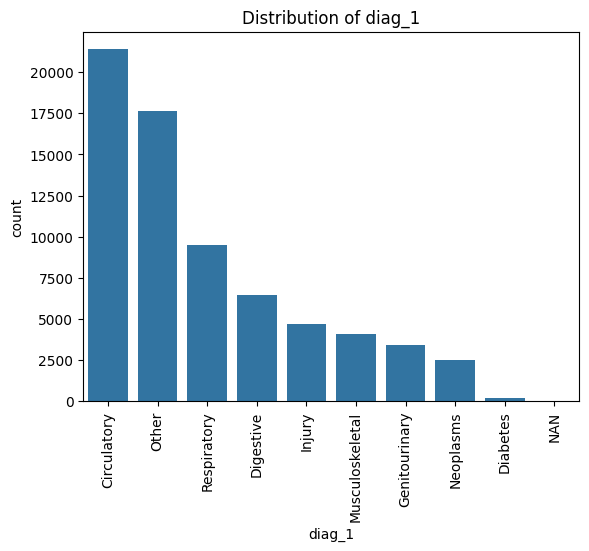

Pie chart


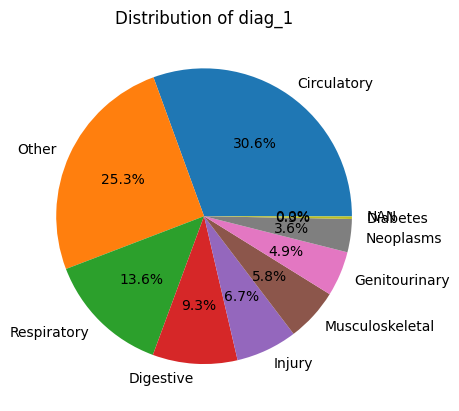

In [56]:
analyzeCategoricalColumn(df, 'diag_1')

Column name: diag_2
Data type: category
mode: Other

Number of unique values: 10

Unique values: 
['NAN', 'Other', 'Diabetes', 'Neoplasms', 'Circulatory', 'Respiratory', 'Injury', 'Musculoskeletal', 'Genitourinary', 'Digestive']
Categories (10, object): ['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', ..., 'NAN', 'Neoplasms', 'Other', 'Respiratory']

ValueCounts: 
diag_2
Other              22784
Circulatory        22083
Respiratory         6928
Genitourinary       5330
Diabetes            4996
Digestive           2856
Injury              1822
Neoplasms           1600
Musculoskeletal     1295
NAN                  293
Name: count, dtype: int64

ValueCounts: Normalized
diag_2
Other              0.325546
Circulatory        0.315530
Respiratory        0.098990
Genitourinary      0.076157
Diabetes           0.071385
Digestive          0.040808
Injury             0.026033
Neoplasms          0.022861
Musculoskeletal    0.018503
NAN                0.004186
Name: proportion, dtype: floa

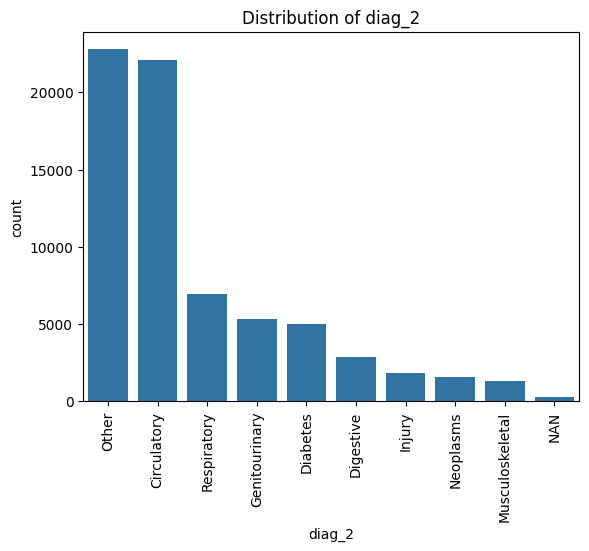

Pie chart


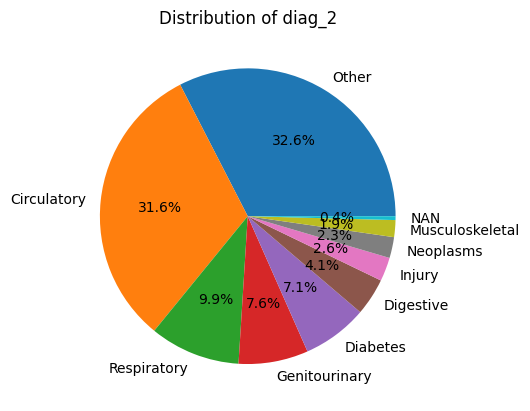

In [57]:
analyzeCategoricalColumn(df, 'diag_2')

Column name: diag_3
Data type: category
mode: Other

Number of unique values: 10

Unique values: 
['NAN', 'Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury', 'Neoplasms', 'Genitourinary', 'Musculoskeletal', 'Digestive']
Categories (10, object): ['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', ..., 'NAN', 'Neoplasms', 'Other', 'Respiratory']

ValueCounts: 
diag_3
Other              23592
Circulatory        20866
Diabetes            8981
Respiratory         4652
Genitourinary       4049
Digestive           2700
Injury              1409
Musculoskeletal     1368
NAN                 1224
Neoplasms           1146
Name: count, dtype: int64

ValueCounts: Normalized
diag_3
Other              0.337091
Circulatory        0.298141
Diabetes           0.128324
Respiratory        0.066469
Genitourinary      0.057854
Digestive          0.038579
Injury             0.020132
Musculoskeletal    0.019546
NAN                0.017489
Neoplasms          0.016374
Name: proportion, dtype: floa

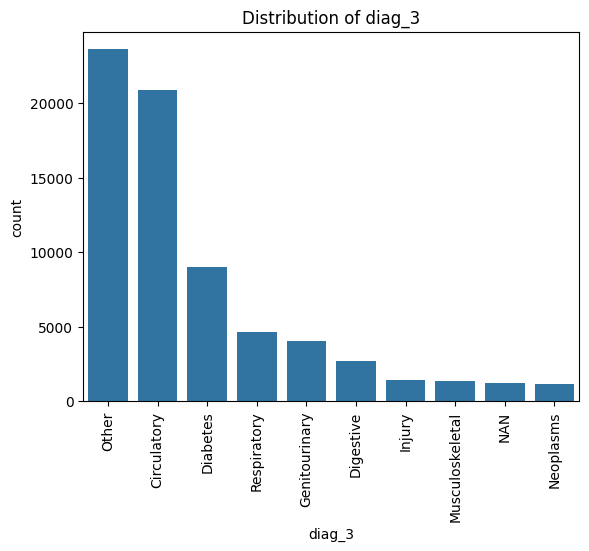

Pie chart


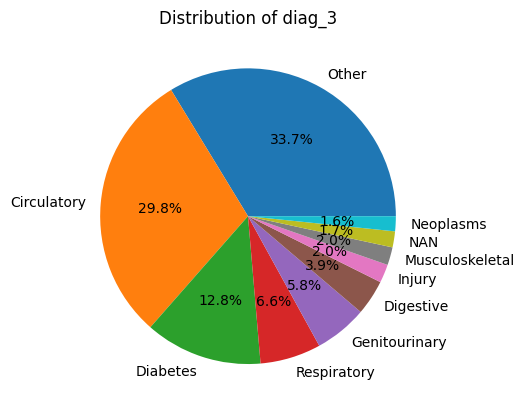

In [58]:
analyzeCategoricalColumn(df, 'diag_3')

### Column: 'change'

Column name: change
Data type: category
mode: No

Number of unique values: 2

Unique values: 
['No', 'Ch']
Categories (2, object): ['Ch', 'No']

ValueCounts: 
change
No    38492
Ch    31495
Name: count, dtype: int64

ValueCounts: Normalized
change
No    0.549988
Ch    0.450012
Name: proportion, dtype: float64
Value count plot


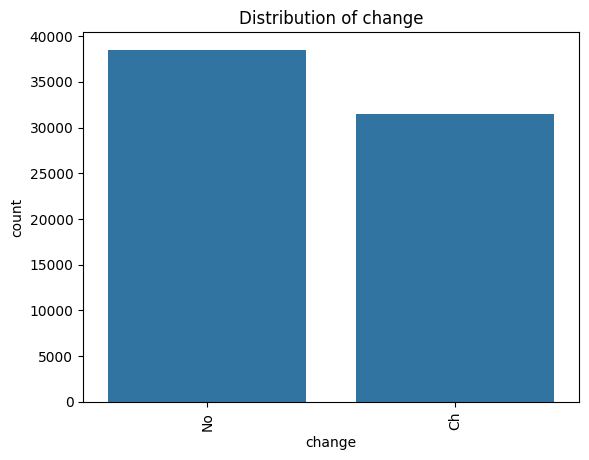

Pie chart


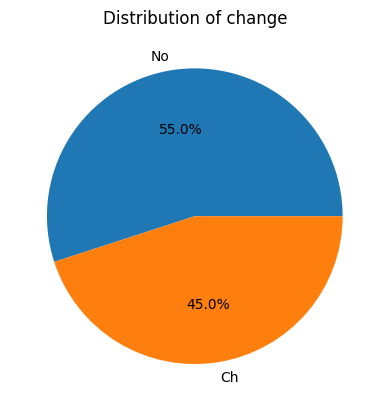

In [59]:
analyzeCategoricalColumn(df, 'change')

The column has a good balanced data.

### Column: 'diabetesMed'

Column name: diabetesMed
Data type: category
mode: Yes

Number of unique values: 2

Unique values: 
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

ValueCounts: 
diabetesMed
Yes    53302
No     16685
Name: count, dtype: int64

ValueCounts: Normalized
diabetesMed
Yes    0.761599
No     0.238401
Name: proportion, dtype: float64
Value count plot


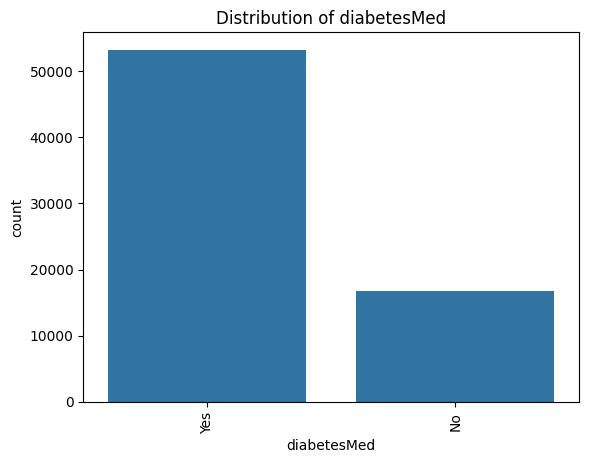

Pie chart


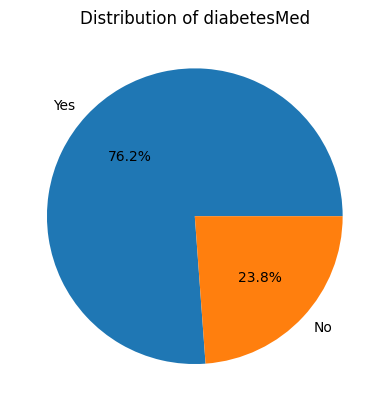

In [60]:
analyzeCategoricalColumn(df, 'diabetesMed')

The value Yes dominates.

### Column:  'readmitted'

Column name: readmitted
Data type: category
mode: NO

Number of unique values: 2

Unique values: 
['NO', 'YES']
Categories (2, object): ['NO', 'YES']

ValueCounts: 
readmitted
NO     41476
YES    28511
Name: count, dtype: int64

ValueCounts: Normalized
readmitted
NO     0.592624
YES    0.407376
Name: proportion, dtype: float64
Value count plot


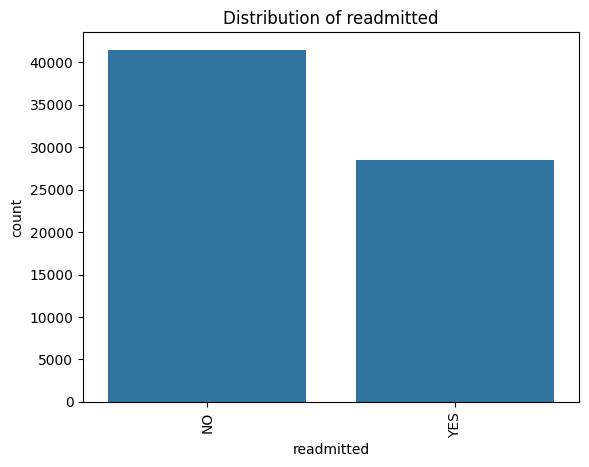

Pie chart


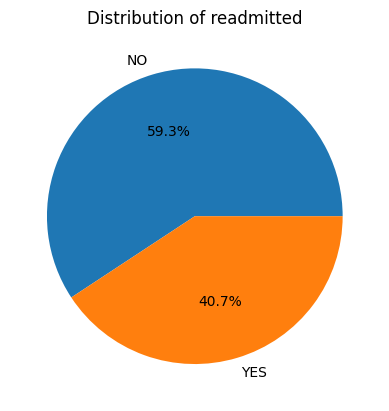

In [61]:
analyzeCategoricalColumn(df, 'readmitted')

This is our target variable. We have a good balanced data here.

### Column: 'age-binned'

Column name: age-binned
Data type: category
mode: 70-80

Number of unique values: 8

Unique values: 
['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
Categories (8, object): ['0-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-90' < '90-100']

ValueCounts: 
age-binned
70-80     17749
60-70     15688
50-60     12351
80-90     11110
40-50      6828
30-40      2692
0-30       1808
90-100     1761
Name: count, dtype: int64

ValueCounts: Normalized
age-binned
70-80     0.253604
60-70     0.224156
50-60     0.176476
80-90     0.158744
40-50     0.097561
30-40     0.038464
0-30      0.025833
90-100    0.025162
Name: proportion, dtype: float64
Value count plot


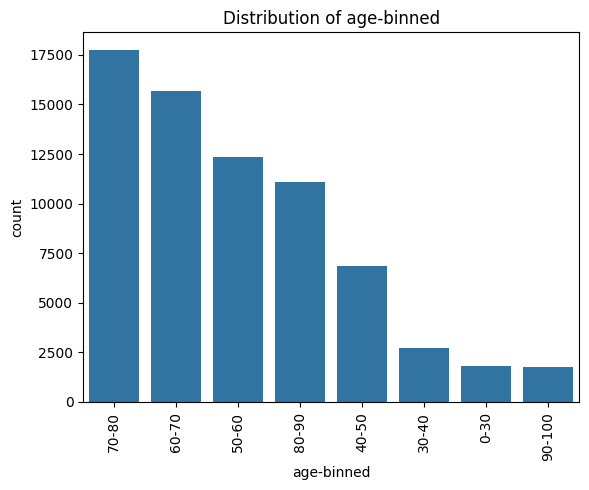

Pie chart


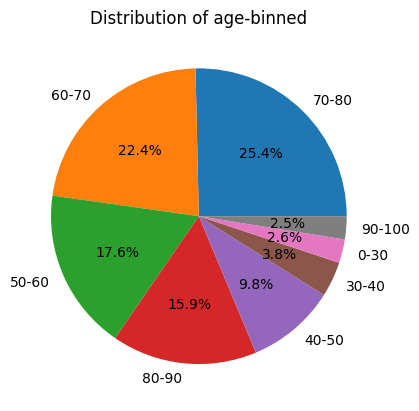

In [62]:
analyzeCategoricalColumn(df, 'age-binned')

The column has a good balance. However during model development, we may consider broader bin values.

## Numerical Columns

In [63]:
df.select_dtypes(include = ['number']).columns

Index(['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin'],
      dtype='object')

### Helper functions

In [64]:
from scipy.stats import skew, kurtosis

def analyzeNumericalColumn(df, columnName):
    print('statistics') 
    print(f'mean: {df[columnName].mean()}')
    print(f'median: {df[columnName].median()}')
    print(f'std: {df[columnName].std()}')
    print(f'variance: {df[columnName].var()}')
    print(f'skewness: {skew(df[columnName])}')
    print(f'kurtosis: {kurtosis(df[columnName])}')

    print()
    plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches
    plt.subplot(2, 1, 1)
    sns.histplot(df[columnName], kde=True)
    plt.title(f'Histogram {columnName}')

    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[columnName])
    plt.title('Box Plot')
    
    plt.tight_layout()
    plt.show()


### Column: 'num_lab_procedures'

statistics
mean: 42.87586266020833
median: 44.0
std: 19.894290801305175
variance: 395.78280648689577
skewness: -0.21956125992672557
kurtosis: -0.29937374238762615



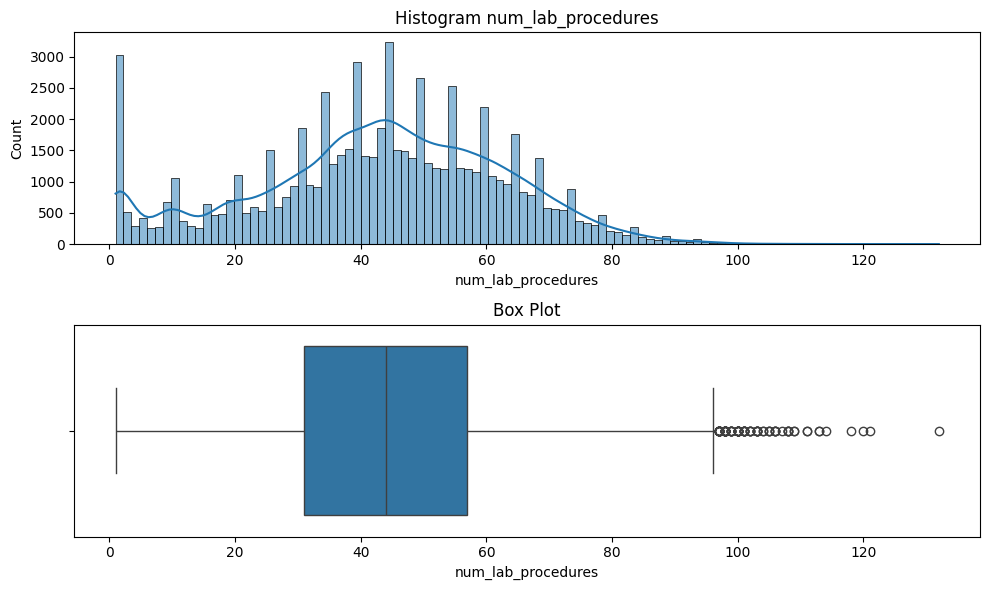

In [65]:
analyzeNumericalColumn(df, 'num_lab_procedures')

The data has a few outliers. For now we keep the data as is, we may consider to drop the data with outliers when training the model.

### Column: 'num_procedures'

statistics
mean: 1.4253789989569492
median: 1.0
std: 1.7570033769956468
variance: 3.087060866774107
skewness: 1.2276650713024546
kurtosis: 0.56000653697135



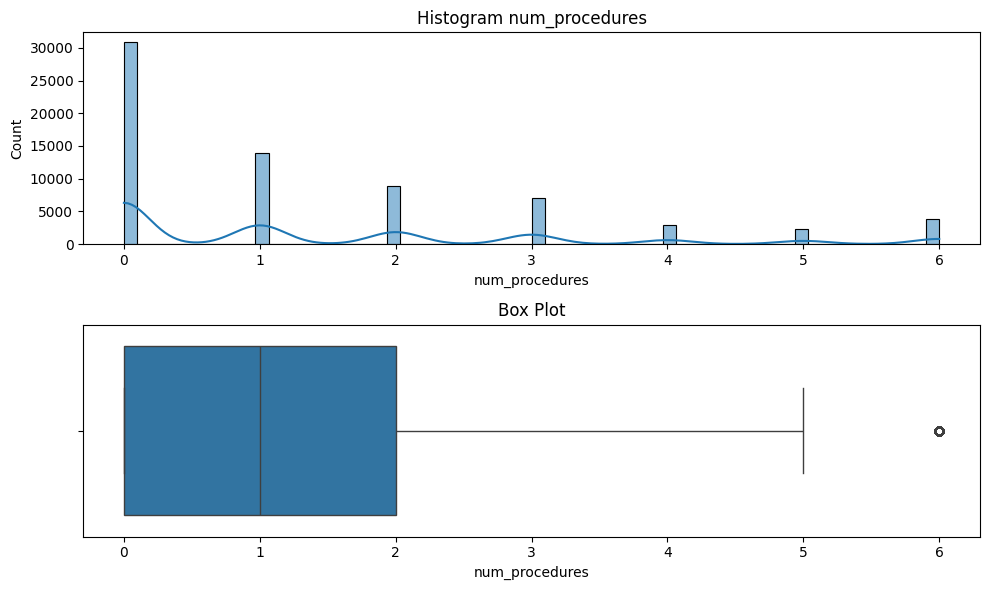

In [66]:
analyzeNumericalColumn(df, 'num_procedures')

Most of the patients have no or one procedures.

### Column: 'num_medications'

statistics
mean: 15.665280694986212
median: 14.0
std: 8.287321108810042
variance: 68.6796911605285
skewness: 1.4345505749008736
kurtosis: 3.8547610549007354



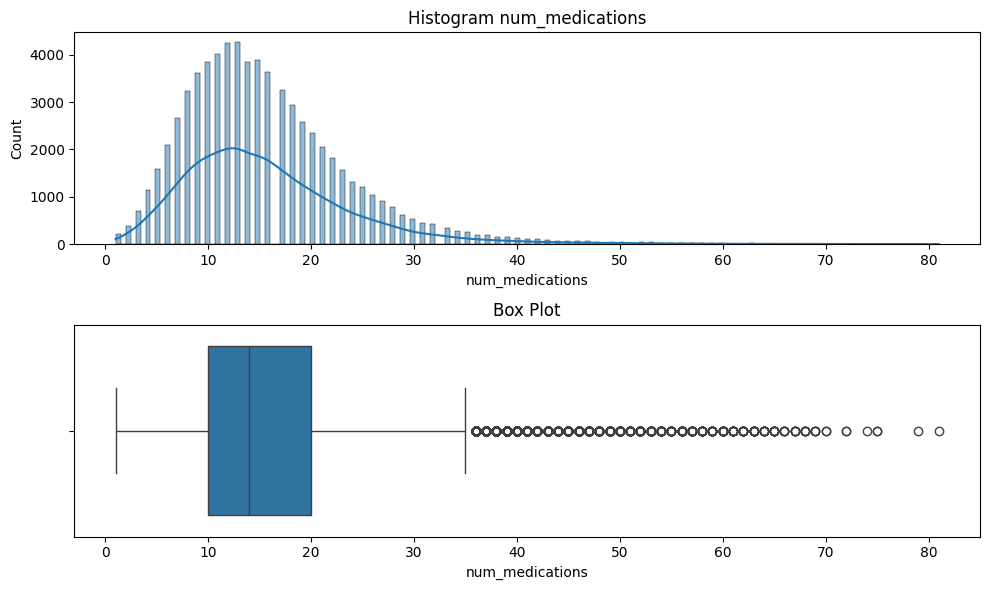

In [67]:
analyzeNumericalColumn(df, 'num_medications')

The column has right skewed distribution. It also has a few number of outliers. We may consider to drop the outliers when training a model.

### Column: 'number_outpatient'

statistics
mean: 0.2795947818880649
median: 0.0
std: 1.0641075526762565
variance: 1.1323248836626518
skewness: 9.696147470299849
kurtosis: 184.97049024992504



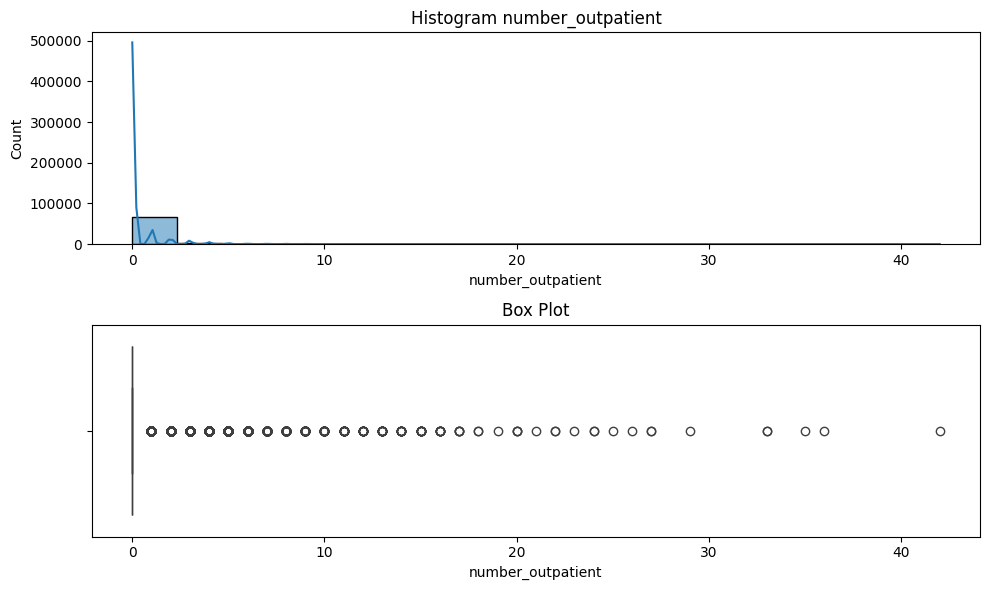

In [68]:
analyzeNumericalColumn(df, 'number_outpatient')

Most of the patients had 0 or 1 number of outpatient visits. For now we keep the column.

### Column: 'number_emergency'

statistics
mean: 0.1039050109306014
median: 0.0
std: 0.5118324275802383
variance: 0.2619724339226798
skewness: 21.22962404854853
kurtosis: 1209.2128534954843



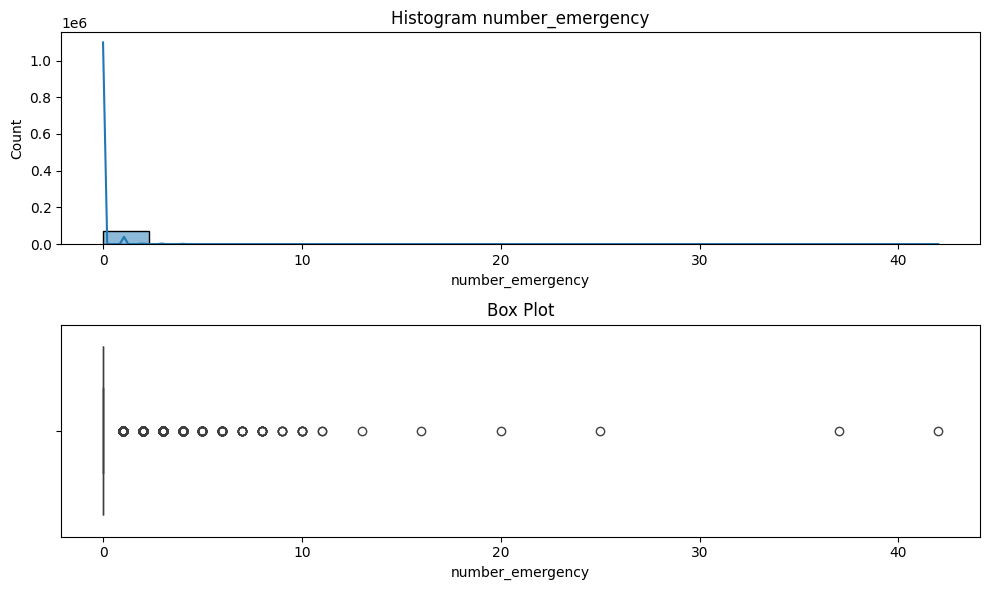

In [69]:
analyzeNumericalColumn(df, 'number_emergency')

Most of the patients had 0 or 1 number of emergency visits. For now we keep the column.

### Column: 'number_inpatient'

statistics
mean: 0.17627559403889292
median: 0.0
std: 0.6016329619987312
variance: 0.36196222096336667
skewness: 5.5865968646697866
kurtosis: 47.324759643411845



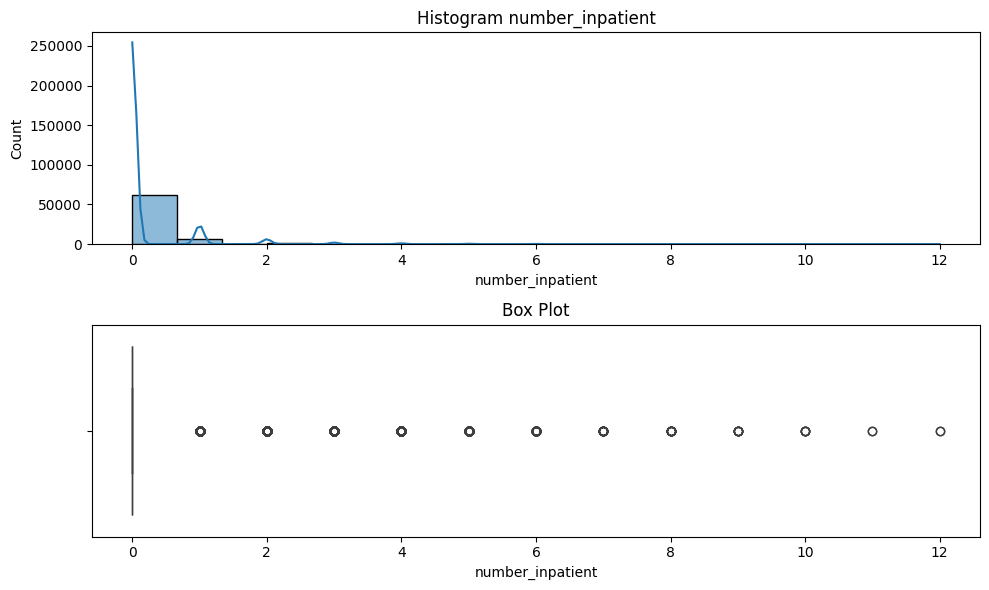

In [70]:
analyzeNumericalColumn(df, 'number_inpatient')

Most of the patients had 0 or 1 number of inpatient visits. For now we keep the column.

### Column: 'number_diagnoses'

statistics
mean: 7.224170203037707
median: 8.0
std: 2.0012569767786332
variance: 4.005029487105155
skewness: -0.7248960959574201
kurtosis: -0.37319325583025353



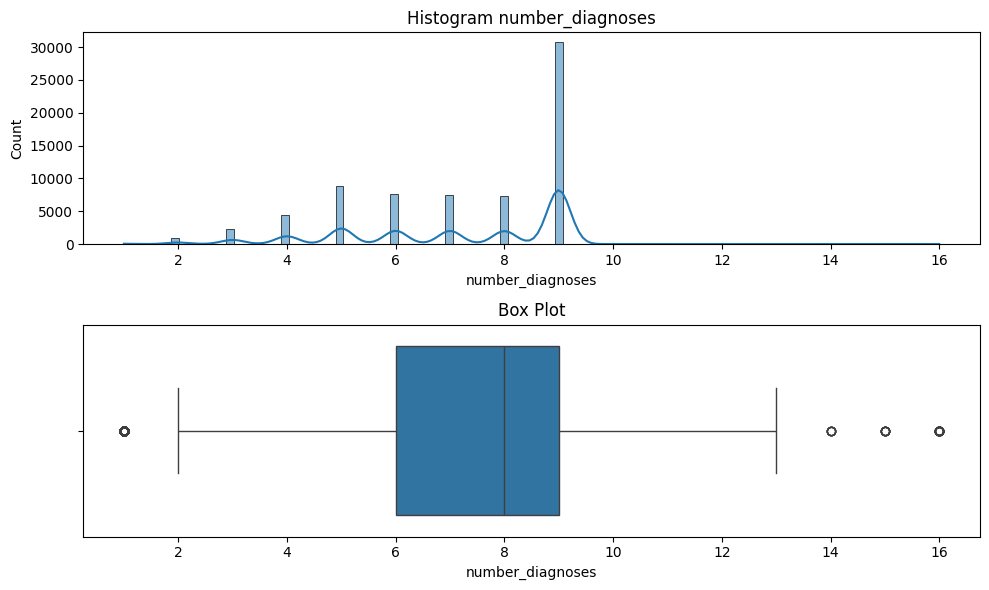

In [71]:
analyzeNumericalColumn(df, 'number_diagnoses')

Most common number of diagnoses is 9.

This brings us to the end of univariate analysis of the dataset.